In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Let us demonstrate the binomial distribution using an example**

Let us perform an experiment where we administer a drug to a patient. The treatment of a single patient
with the drug results in only one of two outcomes - Either the patient is cured or not cured, where
the two outcomes are mutually exclusive. In addition, only one of these outcomes is possible
after treatment. A patient cannot be both cured and not cured after treatment. This experiment is called a binomial trial. A binomial trial is a single binomial experiment or observation. Each binomial
trial must be independent. The result of a patient’s treatment does not influence the outcome of
the treatment for a different patient.

Let's say we perform the experiment on three patients, A, B, C. So the number of binomial trials in this case is 3(N=3). the four possible results are
1. three cures;
2. two cures and one failure;
3. two failures and one cure;
4. three failures.

And let's say the probability of success (the patient is cured), p=0.75. Let us perform this process 10000 times to get a more accurate result. This implies, everyday, for 10000 days straight, we perfrom 3 binomial trials and take note of the outcomes.

Now let's implement it.

In [2]:
'''this says define an array of size 10000 where the data follows a binomial distribution
with n=3 and p=0.75.'''

x = np.random.binomial(n=3, p=0.75, size=10000)

In [3]:
# let's put it in a dataframe
df = pd.DataFrame(data=x, columns=["cured"])
df["not cured"] = 3-df["cured"]
df.head()

,cured,not cured
0,2,1
1,3,0
2,3,0
3,2,1
4,2,1


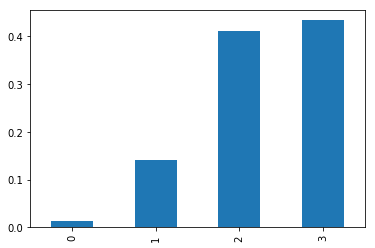

In [7]:
# now let's see the probability distribution
pd = df.cured.value_counts().sort_index()/10000
pd.plot(kind="bar")

In [5]:
# Let's interpret the graph

'''From the graph, we can see that the probability that 3 patients will be cured is around 0.45 and is 
the highest. From this we can also find the probability that x patients will be cured out of n in different 
scenarios'''

'From the graph, we can see that the probability that 3 patients will cure is around 0.4 '